# Added Data Dictionary:
- 'start_date_converted' = the original 'start_date' column was in *Excel serial date numbers*; this column is in datetime Y-m-d format


## -----------------------------------------------------------------------------------------------

## Notes:
- 7.5% of schools are completely missing all their 'overall_rating' data, in this EDA notebook
- 1,766 schools present in this dataset (1,901 exist in SchoolLocationData_EDA; 135 difference)
- all together, 268/1,901 schools are either completely missing or are missing key metrics in this analysis (14.1%)

'bn' (building number) = 'building_code', in SchoolLocationData_EDA
* K = Brooklyn
* M = Manhattan
* Q = Queens
* R = Staten Island (Richmond)
* X = The Bronx

'overall_rating' codes: (according to Claude Haiku)
- O = Operationally Sound (the highest rating - school is functioning well)
- P = Proficient (good performance)
- U = Underdeveloped (needs improvement)
- D = Developing (in progress, showing some improvement)
- WD = Well Developed (strong performance)
- DYO = Demonstrates Year-to-Year Improvement (or similar progress indicator)
- UPF = Possibly "Underperforming" or a specific category
- UD = Underdeveloped (or similar, possibly a variant)

'overall_rating' codes: (according to Gemini)
- Rubric Ratings:
- WD = Well Developed (highest rating)
- P = Proficent
- D = Developing
- U = Underdeveloped (lowest rating)
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Overall/Legacy School Rating:
- O = Outstanding (The highest overall rating a school could receive in the older Progress Report system [e.g., 2007–2010])
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Data/Exclusion Codes:
- UD = U = Unsatisfactory Development
- DYO = Do Your Own (Often used in data models where a school's result was too statistically small to generate a reliable comparative score, indicating a school should use internal data for assessment)
- UPF = U = Underperforming or Unsatisfactory Progress/Fail (A generic placeholder for a failing/non-performing result, or a data-specific null value)

# Setup:

In [57]:
#!pip install sodapy

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sodapy import Socrata

import matplotlib.pyplot as plt
import numpy as np

#import os

#MyAppToken= os.getenv("MyAppToken")
#USERNAME = os.getenv("USERNAME")
#PASSWORD = os.getenv("PASSWORD")

In [58]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)


#client = Socrata('data.cityofnewyork.us',
#                 MyAppToken,
#                 username=USERNAME,
#                 password=PASSWORD)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("3wfy-sn5g", limit=10000)

#results_df = pd.DataFrame.from_records(results)
#results_df.to_csv('QualityReviewRatings.csv', index=False)

In [59]:
results_df = pd.read_csv('../data/QualityReviewRatings.csv')

In [60]:
results_df.shape    # actually 9,008 rows, last row is just a label

(9009, 45)

In [61]:
results_df.sample(10)

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5
3086,X188,2008-09,39868.0,WD,WD,WD,WD,P,No Data,No Data,No Data,WD,WD,WD,WD,P,No Data,No Data,No Data,WD,WD,WD,WD,WD,No Data,No Data,No Data,No Data,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD
8880,K682,2019-20,43789.0,No Data,WD,WD,WD,WD,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,WD,WD,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data
3870,K266,2010-11,40490.0,P,D,P,P,P,No Data,No Data,No Data,No Data,P,P,D,P,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data,No Data,P,P,P,WD,No Data,No Data,No Data,No Data,P,P,D,P,No Data,No Data,No Data,No Data
2853,M036,2008-09,39735.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,No Data,No Data,No Data,P,P,UPF,P,WD,No Data,No Data,No Data,No Data,P,P,WD,WD,WD,No Data,No Data,No Data,WD,P,P,P,WD,No Data,No Data,No Data,P
5615,K345,2013-14,41701.0,D,D,D,P,D,No Data,No Data,No Data,No Data,No Data,D,No Data,No Data,No Data,No Data,No Data,No Data,D,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,P,D,No Data,No Data,No Data,No Data,No Data,No Data,D,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4155,K329,2010-11,40625.0,P,D,P,P,WD,No Data,No Data,No Data,No Data,P,D,P,P,No Data,No Data,No Data,No Data,P,P,WD,P,No Data,No Data,No Data,No Data,No Data,P,P,P,WD,No Data,No Data,No Data,No Data,P,P,P,P,No Data,No Data,No Data,No Data
7283,Q089,2015-16,42426.0,No Data,WD,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
7265,X059,2015-16,42411.0,No Data,WD,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4997,X344,2012-13,41303.0,P,P,P,P,D,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,P,D,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data
2276,X360,2007-08,39521.0,WD,WD,WD,WD,P,WD,P,WD,WD,WD,WD,WD,WD,WD,WD,P,WD,P,P,WD,P,WD,WD,WD,No Data,P,WD,WD,WD,WD,WD,WD,P,WD,WD,WD,WD,WD,WD,WD,WD,WD


In [62]:
results_df['start_date'].sort_values()

0       38810.0
1       38810.0
2       38810.0
4       38812.0
5       38812.0
6       38812.0
7       38812.0
10      38814.0
9       38814.0
11      38814.0
8       38814.0
12      38817.0
13      38831.0
15      38831.0
16      38831.0
18      38831.0
19      38831.0
22      38833.0
20      38833.0
21      38833.0
23      38833.0
28      38835.0
27      38835.0
24      38835.0
26      38835.0
29      38838.0
35      38839.0
32      38839.0
33      38839.0
34      38839.0
36      38839.0
37      38839.0
44      38845.0
43      38845.0
42      38845.0
41      38845.0
40      38845.0
38      38845.0
39      38845.0
47      38847.0
48      38847.0
49      38847.0
50      38847.0
51      38847.0
45      38847.0
46      38847.0
52      38848.0
56      38852.0
54      38852.0
55      38852.0
59      38852.0
58      38852.0
57      38852.0
53      38852.0
60      38853.0
66      38854.0
61      38854.0
62      38854.0
63      38854.0
64      38854.0
65      38854.0
68      38854.0
75      

# Data cleaning and engineering:

In [63]:
# Convert Excel serial date numbers to datetime
results_df['start_date_converted'] = pd.to_datetime(results_df['start_date'], unit='D', origin='1900-01-01')

results_df[['bn', 'start_date_converted', 'overall_rating']].sample(15)

,bn,start_date_converted,overall_rating
3758,K285,2010-05-12,P
1972,K036,2008-01-24,WD
4542,Q068,2012-02-03,P
2599,X273,2008-05-14,P
3118,Q430,2009-03-06,WD
4916,X140,2012-12-13,D
7598,K327,2016-11-17,No Data
38,K350,2006-05-10,P
5591,K012,2014-02-14,D
8282,K088,2018-03-24,No Data


In [64]:
# Drop the last row (the 'All Quality Review Ratings from 2005 to 2020' label row)
results_df = results_df.drop(results_df.index[-1])

print(f"New shape: {results_df.shape}")

New shape: (9008, 46)


In [65]:
# re-sort by 'bn' and 'start_date_converted' to see trends over time for each school
results_df = results_df.sort_values(by=['start_date_converted'])
results_df[['bn', 'start_date_converted', 'overall_rating']][100:150]

,bn,start_date_converted,overall_rating
111,K061,2006-09-27,WD
112,K161,2006-09-27,WD
118,K539,2006-09-27,P
113,K189,2006-09-27,WD
117,K312,2006-09-27,WD
116,K251,2006-09-27,WD
120,K625,2006-09-27,P
114,K198,2006-09-27,P
115,K208,2006-09-27,WD
121,K246,2006-09-28,P


In [66]:
# Find 'bn' value that starts with lowercase 'q' and 'k'
#lowercase_q = results_df[results_df['bn'].str[0] == 'q']
#lowercase_k = results_df[results_df['bn'].str[0] == 'k']

# Fix them by converting to uppercase
results_df.loc[results_df['bn'].str[0] == 'q', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'q', 'bn'].str.upper()
results_df.loc[results_df['bn'].str[0] == 'k', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'k', 'bn'].str.upper()

## -----------------------------------------------------------------------------------------------
# Imporant Sets/Rating Values:

In [67]:
bn_boroughs = ['K', 'M', 'Q', 'R', 'X']

In [68]:
# 8 = best; 1 = worst; 1 = Do Your Own value; 0 = No Data
ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}

## -----------------------------------------------------------------------------------------------

In [69]:
all_grouped = results_df.groupby('bn').agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    first_review_date = ('start_date_converted', 'min'),
    last_review_date = ('start_date_converted', 'max')
)

all_grouped.head(20)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
K001,5,2,2007-02-07,2017-01-26
K002,6,2,2006-10-13,2019-04-14
K003,6,2,2007-02-28,2017-01-06
K004,6,2,2007-02-08,2017-12-15
K005,6,2,2007-02-28,2019-10-31
K006,5,2,2007-04-22,2020-01-17
K007,5,2,2007-05-27,2017-02-09
K008,7,2,2007-02-09,2019-01-19
K009,6,2,2007-04-18,2017-01-07


In [70]:
results_df.columns

Index(['bn', 'school_year', 'start_date', 'overall_rating', 'indicator_1_1',
       'indicator_1_2', 'indicator_1_3', 'indicator_1_4', 'indicator_1_5',
       'indicator_1_6', 'indicator_1_7', 'indicatoroverall_1', 'indicator_2_1',
       'indicator_2_2', 'indicator_2_3', 'indicator_2_4', 'indicator_2_5',
       'indicator_2_6', 'indicator_2_7', 'indicatoroverall_2', 'indicator_3_1',
       'indicator_3_2', 'indicator_3_3', 'indicator_3_4', 'indicator_3_5',
       'indicator_3_6', 'indicator_3_7', 'indicator_3_8', 'indicatoroverall_3',
       'indicator_4_1', 'indicator_4_2', 'indicator_4_3', 'indicator_4_4',
       'indicator_4_5', 'indicator_4_6', 'indicator_4_7', 'indicatoroverall_4',
       'indicator_5_1', 'indicator_5_2', 'indicator_5_3', 'indicator_5_4',
       'indicator_5_5', 'indicator_5_6', 'indicator_5_7', 'indicatoroverall_5',
       'start_date_converted'],
      dtype='object')

In [71]:
# group by borough (beginning letter of 'bn')
boroughs_grouped = results_df[results_df['bn'].str[0].isin(bn_boroughs)].groupby(results_df['bn'].str[0]).agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    num_schools = ('bn', lambda x: x.nunique()),
    # line below creates a dictionary of boroughs' schools and a 2D list of their ratings and year the ratings were given
    bn_ratings_dict = ('overall_rating', lambda x: {bn: results_df.loc[results_df['bn'] == bn, ['overall_rating', 'start_date_converted']].values.tolist() for bn in results_df.loc[x.index, 'bn'].unique()})
).rename_axis('borough')

boroughs_grouped

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."


In [72]:
# Adding totals row
boroughs_totals = boroughs_grouped.copy()
# Sum only numeric columns, leave dictionary column as empty dict for totals row
totals_row = boroughs_grouped[['data_pts', 'missing_overall_rating', 'num_schools']].sum()
totals_row['bn_ratings_dict'] = {}
boroughs_totals.loc['Total'] = totals_row
boroughs_totals

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."
Total,9008,3180,1762,{}


In [73]:
results_df[results_df['bn'].str[0] == 'K'].sort_values(by='start_date_converted')[['bn', 'overall_rating', 'start_date_converted']].head()

,bn,overall_rating,start_date_converted
12,K544,P,2006-04-12
13,K337,P,2006-04-26
15,K685,WD,2006-04-26
20,K524,P,2006-04-28
21,K533,P,2006-04-28


## Note:
- was expecting 1,766 schools, not 1,762
-
- *bn_ratings_dict:* in order of start_date_converted
-
- Q: Should they be in alpha/numerical order?

# Dictionaries of Schools' Average QR Scores by Borough:

In [74]:
# creating dictionary of Brooklyn schools:
K_schools_dict = boroughs_grouped.loc['K', 'bn_ratings_dict']
K_schools_dict



{'K544': [['P', Timestamp('2006-04-12 00:00:00')],
  ['P', Timestamp('2007-04-28 00:00:00')],
  ['WD', Timestamp('2008-03-15 00:00:00')],
  ['P', Timestamp('2010-02-10 00:00:00')],
  ['No Data', Timestamp('2014-12-03 00:00:00')]],
 'K337': [['P', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-23 00:00:00')],
  ['WD', Timestamp('2008-05-15 00:00:00')],
  ['WD', Timestamp('2009-05-02 00:00:00')],
  ['D', Timestamp('2012-03-28 00:00:00')],
  ['P', Timestamp('2013-12-06 00:00:00')],
  ['No Data', Timestamp('2015-02-27 00:00:00')],
  ['No Data', Timestamp('2017-10-21 00:00:00')]],
 'K685': [['WD', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-25 00:00:00')],
  ['WD', Timestamp('2008-05-16 00:00:00')],
  ['No Data', Timestamp('2015-04-23 00:00:00')],
  ['No Data', Timestamp('2019-04-06 00:00:00')]],
 'K524': [['P', Timestamp('2006-04-28 00:00:00')],
  ['DYO', Timestamp('2007-05-24 00:00:00')],
  ['WD', Timestamp('2008-05-31 00:00:00')],
  ['P', Timestamp('2

In [75]:
# creating dictionary of the rest of the boroughs' schools:
M_schools_dict = boroughs_grouped.loc['M', 'bn_ratings_dict']
Q_schools_dict = boroughs_grouped.loc['Q', 'bn_ratings_dict']
R_schools_dict = boroughs_grouped.loc['R', 'bn_ratings_dict']
X_schools_dict = boroughs_grouped.loc['X', 'bn_ratings_dict']


In [76]:
M_schools_dict

{'M307': [['P', Timestamp('2006-04-05 00:00:00')],
  ['WD', Timestamp('2008-03-08 00:00:00')],
  ['P', Timestamp('2010-05-12 00:00:00')],
  ['P', Timestamp('2013-11-16 00:00:00')],
  ['No Data', Timestamp('2016-02-11 00:00:00')],
  ['No Data', Timestamp('2017-05-25 00:00:00')]],
 'M459': [['P', Timestamp('2006-04-05 00:00:00')],
  ['DYO', Timestamp('2007-05-24 00:00:00')],
  ['P', Timestamp('2008-05-23 00:00:00')],
  ['P', Timestamp('2012-05-09 00:00:00')],
  ['No Data', Timestamp('2015-04-03 00:00:00')],
  ['No Data', Timestamp('2019-11-23 00:00:00')]],
 'M560': [['WD', Timestamp('2006-04-05 00:00:00')],
  ['DYO', Timestamp('2007-05-23 00:00:00')],
  ['WD', Timestamp('2008-04-09 00:00:00')],
  ['WD', Timestamp('2010-06-04 00:00:00')],
  ['P', Timestamp('2013-11-23 00:00:00')],
  ['No Data', Timestamp('2016-01-23 00:00:00')],
  ['No Data', Timestamp('2018-02-09 00:00:00')]],
 'M294': [['WD', Timestamp('2006-04-07 00:00:00')],
  ['DYO', Timestamp('2007-05-26 00:00:00')],
  ['WD', Timest

# Functions:

In [77]:
def sep_2D_list_to_lists(borough_dict):
    ''' Transforms the 2D list of ratings and dates in the borough_dict into two separate lists;
        one for ratings, one for dates.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        Output:
        * transformed_dict - Dictionary of single borough's school overall Quality Review ratings, with 2D list transformed into two separate lists:
            {'K336': { 'ratings': ['P', 'P', ...], 'dates': ['2020-01-15', '2018-06-10', ...]}, ...}
    '''

    transformed_dict = {}
    
    for bn, twoD_list in borough_dict.items():
        ratings = [item[0] for item in twoD_list]
        dates = [item[1] for item in twoD_list]
        transformed_dict[bn] = [ratings, dates]

    return transformed_dict

def convert_ratings_alpha_to_num(sep_dict, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Simple conversion of alphabetical ratings in a separated borough_dictionary.
        Input:
        * sep_dict - a borough dictionary that has been separated, using the sep_2D_list_to_lists() function.
        Output:
        * None; conversion of ratings happens inplace.
    '''

    for bn, lists in sep_dict.items():
        lists[0] = [ratings_rank[rating] for rating in lists[0]]



def convert_to_avg_ratings(borough_dict, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Converts the borough_dict's 2D list of ratings and dates into average ratings based on the latest date for each school.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for averaging:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}
        Output:
        * avg_ratings_dict - Dictionary of single borough's school average Quality Review ratings and their latest review date, eg. {'K336': [6.0, '2020-01-15', 'K400': [6.0, ...}
    '''

    borough_dict = sep_2D_list_to_lists(borough_dict)

    avg_ratings_dict = {}

    for bn, twoD_list in borough_dict.items():

        # drop non-date entries from date list:
        twoD_list[1] = [date for date in twoD_list[1] if isinstance(date, pd.Timestamp)]

        # Sort the dict by date in descending order to get the latest date first
        sorted_list = sorted(twoD_list[1], reverse=True)
        latest_date = sorted_list[0]
        
        # Convert ratings to numerical values and calculate average
        numeric_ratings = [ratings_rank[rating] for rating in twoD_list[0]]
        avg_rating = np.mean(numeric_ratings) if numeric_ratings else 0
        avg_ratings_dict[bn] = [avg_rating, latest_date]

    return avg_ratings_dict



def barplot_borough_avgs_by_location(avg_ratings_dict, all_schools, location_type) :
    ''' Inputs: 
        * avg_ratings_dict - Dictionary of single borough's school's average overall Quality Review ratings, eg. {'K544': [5.0, Timestamp('2014-12-03 00:00:00')],'K337': [4.0, Timestamp('2017-10-21 00:00:00')], ...}
            Frame ex -->[ 'bn' : [avg_rating, latest_date] ]

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * location_type - string specifying which location type to group by: 'Zip', 'Census Tract', or 'Community District'

        Output: 
        * barplots of school overall Quality Review ratings for each specified location type
    '''

    # Create a DataFrame from the avg_ratings_dict
    borough_df = pd.DataFrame(list(avg_ratings_dict.items()), columns=['bn', 'twoD_list'])

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['avg_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda x: x[0]
    )
    borough_df['latest_review_date'] = borough_df['twoD_list'].apply(
        lambda x: x[1]
    )

    # Merge with all_schools to get location info
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')

    # Plotting the data by making separate plots for each cluster within the location_type, i.e. separate plots for each Zip code if location_type='Zip'

    unique_locations = merged_df[location_type].unique()


    print(f"Unique {location_type} values: {len(unique_locations)}")


    for loc in unique_locations:
        if pd.notna(loc):
            loc_df = merged_df[merged_df[location_type] == loc]
            plt.figure(figsize=(20, 12))
            plt.ylim(0, 8)
            plt.bar(loc_df['bn'], loc_df['avg_ratings_numeric'])
            plt.xlabel('School BN')
            plt.ylabel('Average Overall Rating (Numeric)')
            plt.title(f'School Overall Quality Review Ratings for {location_type} {loc}')
            plt.xticks(rotation=90)
            plt.legend()
            plt.tight_layout()
            plt.show()






def barplot_borough_schools_by_yr(borough_dict, all_schools, location_type, start_year, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):

    # I am trying to set up a function that will plot each borough's school ratings by year and sectioned by location type...

    ''' Inputs: 
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': ['P', 'P', 'P', 'D'], 'K400': ['P'], ...}.     # CHANGED DICT TO INCLUDE 2D LIST W DATETIMES
        Uses associated ratings_rank dictionary to convert ratings to numerical values for plotting

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * location_type - string specifying which location type to group by: 'Zip', 'Census Tract', or 'Community District'

        * start_year - integer specifying which year to filter by, e.g. 2020

        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for plotting;
            Default parameters:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}


        Output: 
        * Visuals: bar plots of school overall Quality Review ratings for each school in the borough,
          grouped by location_type in a specified year
    '''

    # convert start_year to datetime for filtering
    start_year = str(start_year) + '-01-01'
    start_year = pd.to_datetime(start_year)

    # Create a DataFrame from the borough_dict
    borough_df = pd.DataFrame(list(borough_dict.items()), columns=['bn', 'twoD_list'])

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['overall_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda ratings: [ratings_rank[rating[0]] for rating in ratings]                     # MAPPING OF RATINGS TO NUMERICAL VALUES HAPPENS HERE
    )
    borough_df['rating_dates'] = borough_df['twoD_list'].apply(
        lambda x: [rating_date[1] for rating_date in x]
    )
    


    # Map overall_ratings_list to numerical values using ratings_rank
    # 1. EXPLODE: Convert the lists into individual rows
    # This creates a 'long' DataFrame where each school's rating/date pair gets its own row.
    exploded_df = borough_df.explode(['overall_ratings_numeric', 'rating_dates'])

    # 2. CONVERT: Ensure the exploded column is a proper datetime Series
    exploded_df['rating_dates'] = pd.to_datetime(exploded_df['rating_dates'])

    # Merge with all_schools to get location info (using the exploded DataFrame)
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')

    loc_col = location_type  # e.g., 'Zip', 'Census Tract', 'Community District'



    def get_yr_index(yr_list, yr):
        ''' Helper function to get the index of the year in the rating_dates list '''
        for idx, date in enumerate(yr_list):
            if date.year == yr.year:
                return idx
        return None
    


    merged_df['rating_date_index'] = merged_df['rating_dates'].apply(get_yr_index, yr=start_year)

    # coercing the rating_date_index column to ensure they are all integers:
    merged_df['rating_date_index'] = merged_df['rating_date_index'].astype('Int64')


    # use the rating_date_index to select the corresponding rating for that year:
    merged_df['target_yr_rating'] = merged_df.apply(
        lambda row: row['overall_ratings_numeric'][row['rating_date_index']] if pd.notna(row['rating_date_index']) else np.nan,
        axis=1
    )

    merged_df['target_yr_rating'] = merged_df['target_yr_rating'].astype('Int64')

    
    # Group by the location column and calculate the average rating for that location
    agg_df = merged_df.groupby(loc_col)['target_yr_rating'].mean().reset_index()
    agg_df.rename(columns={'target_yr_rating': 'avg_target_year_rating'}, inplace=True)


    # PLOTTING:
    if not agg_df.empty:
        agg_df.dropna(subset=['avg_target_year_rating'], inplace=True)

        plt.figure(figsize=(12, 6))
        
        # Create the bar plot using the aggregated data
        plt.bar(
            agg_df[loc_col].astype(str),
            agg_df['avg_target_year_rating'].values.astype(float),
            color='skyblue'
        )
        
        plt.xlabel(loc_col)
        plt.ylabel('Rating (Numeric)')
        plt.title(f'School QR Rating by {loc_col} in {start_year}')
        
        plt.xticks(rotation=90)
            
        #plt.tight_layout()
        #plt.savefig(f'barplot_rating_by_{loc_col}_{start_year}.png')
        plt.show()
        #plt.close() # Close figure to prevent memory issues

    else:
            print(f"No data available for plotting {loc_col} in {start_year}")



In [78]:
def convert_borough_dict_to_df(borough_dict):
    ''' Converts a borough's school dictionary into a pandas DataFrame.
        Input:
        * borough_dict - Dictionary of a borough's school overall Quality Review ratings, 
          eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...], 'K400': [['P', '2019-03-20'], ...], ...}
        Output:
        * df - DataFrame with columns 'School Code', 'QR Score' (numeric), and 'Assessment Time'
    '''
    
    # Separate the 2D lists into ratings and dates
    separated_dict = sep_2D_list_to_lists(borough_dict)
    
    # Convert alphabetical ratings to numerical
    convert_ratings_alpha_to_num(separated_dict)
    
    # Create a list to store the records
    data_records = []
    
    # Iterate through the school dictionary
    for school_code, score_time_lists in separated_dict.items():
        qr_scores = score_time_lists[0]
        assessment_times = score_time_lists[1]
        
        # Iterate through the scores and times simultaneously
        for score, time in zip(qr_scores, assessment_times):
            # Create a new record for each assessment
            data_records.append({
                'bn': school_code,
                'QR Score': score,
                'Assessment Time': time
            })
    
    # Create and return the DataFrame
    df = pd.DataFrame(data_records)
    return df


# Importing School Location Data:

In [79]:
# importing data for school location info (zip, census tract, community district)
school_location_df = pd.read_csv('../cleaned_data/location_data.csv')
school_location_df = school_location_df[['School Code', 'Location Name', 'Primary Address', 'City', 'Zip', 'Census Tract', 'Community District']]
school_location_df = school_location_df.rename(columns={'School Code' : 'bn'})
school_location_df[['Zip', 'Census Tract', 'Community District']] = school_location_df[['Zip', 'Census Tract', 'Community District']].astype('Int64')

# Testing Functions:

In [80]:
new_M_dict = sep_2D_list_to_lists(M_schools_dict)
convert_ratings_alpha_to_num(new_M_dict)

# Create a list to store the records
data_records = []

# Iterate through the school dictionary
for school_code, score_time_lists in new_M_dict.items():
    qr_scores = score_time_lists[0]
    assessment_times = score_time_lists[1]

    # Iterate through the scores and times simultaneously
    for score, time in zip(qr_scores, assessment_times):
        # Create a new record for each assessment
        data_records.append({
            'School Code': school_code,
            'QR Score': score,
            'Assessment Time': time
        })

# Create the DataFrame
M_df = pd.DataFrame(data_records)

print(M_df.head(12))

   School Code  QR Score Assessment Time
0         M307         6      2006-04-05
1         M307         7      2008-03-08
2         M307         6      2010-05-12
3         M307         6      2013-11-16
4         M307         0      2016-02-11
5         M307         0      2017-05-25
6         M459         6      2006-04-05
7         M459         1      2007-05-24
8         M459         6      2008-05-23
9         M459         6      2012-05-09
10        M459         0      2015-04-03
11        M459         0      2019-11-23


In [81]:
K_avg_ratings = convert_to_avg_ratings(K_schools_dict)
#barplot_borough_avgs_by_location(K_avg_ratings, school_location_df, 'Community District')

# commnented out for now...
# Number of plots generated may be too large to handle all at once;
# Zip: 39
# Census Tract: 301
# Community District: 19


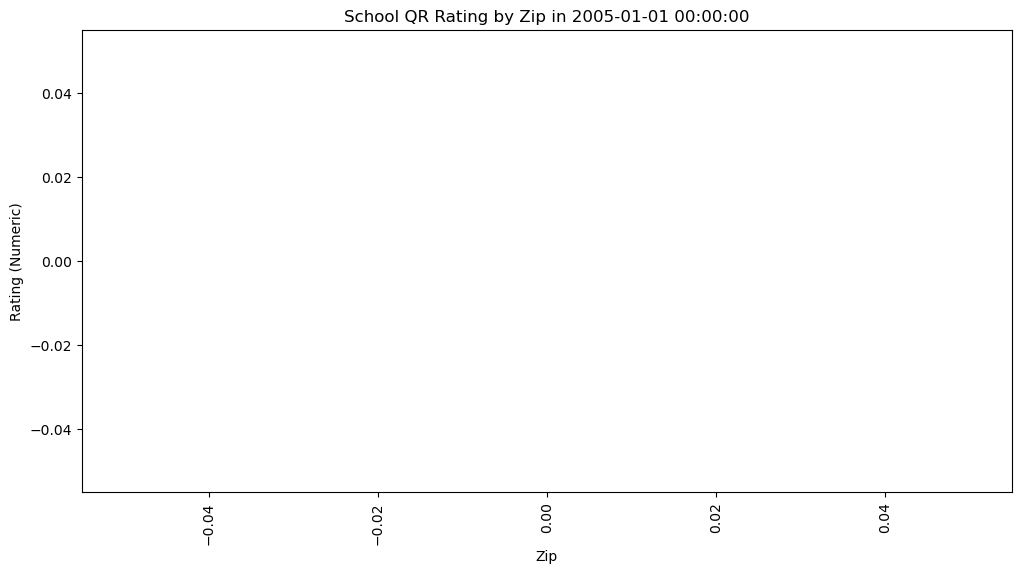

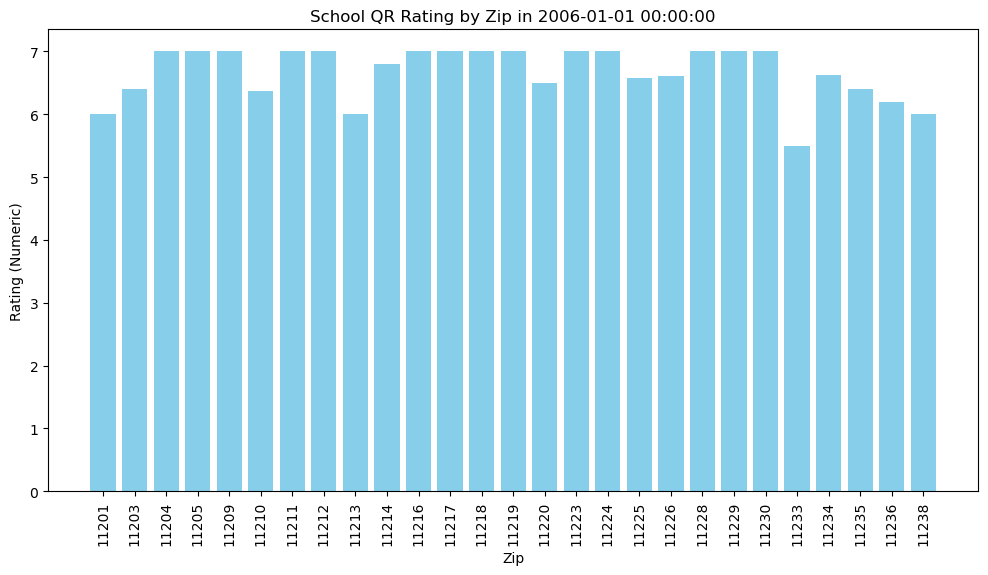

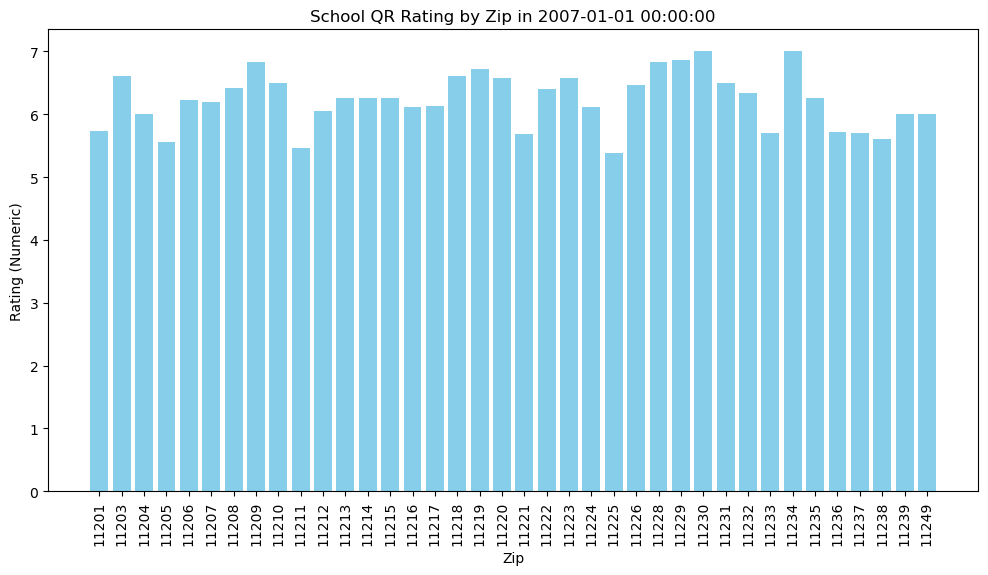

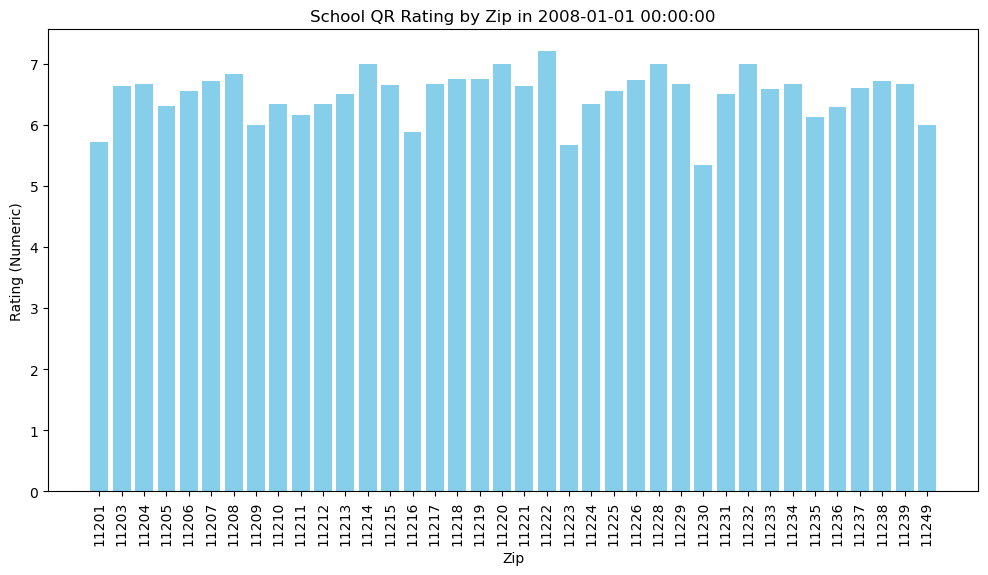

In [82]:
# a simple function for showing changes of QR ratings over time (in years)

yrs = [2005, 2006, 2007, 2008]

for yr in yrs:
    barplot_borough_schools_by_yr(K_schools_dict, school_location_df, 'Zip', yr)


In [83]:
school_location_df[school_location_df['bn'] == 'K337']['Zip']

1008    11214
Name: Zip, dtype: Int64

# Data Analysis:

In [84]:
# 1,766 schools total
all_grouped.describe()

,data_pts,missing_overall_rating,first_review_date,last_review_date
count,1762.000000,1762.000000,1762,1762
mean,5.112372,1.804767,2008-03-19 03:39:01.430193152,2017-04-01 18:34:43.995459840
min,1.000000,0.000000,2006-04-05 00:00:00,2006-05-24 00:00:00
25%,4.000000,2.000000,2006-12-10 00:00:00,2016-12-08 00:00:00
50%,5.000000,2.000000,2007-03-14 12:00:00,2017-11-11 00:00:00
75%,6.000000,2.000000,2007-05-24 00:00:00,2018-11-17 00:00:00
max,12.000000,4.000000,2020-02-07 00:00:00,2020-03-14 00:00:00
std,1.926496,0.704830,NaN,NaN


In [85]:
totally_missing = all_grouped.loc[all_grouped['data_pts'] == all_grouped['missing_overall_rating']]

# 133 schools missing all of their overall_rating data
totally_missing.sample(10)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
X349,2,2,2015-04-17,2018-02-08
Q329,2,2,2015-05-13,2019-05-12
X314,2,2,2015-05-16,2017-03-04
X311,2,2,2015-03-13,2017-02-17
Q297,2,2,2015-04-30,2020-02-01
M282,2,2,2015-05-01,2016-11-03
X593,1,1,2019-12-20,2019-12-20
K654,2,2,2015-05-06,2020-01-31
X320,2,2,2014-11-26,2017-12-21


In [86]:
print(results_df[results_df['overall_rating'] == 'No Data'].shape)
grouped_df = results_df[results_df['overall_rating'] == 'No Data'].groupby('bn')['overall_rating', ].count().reset_index()
print(grouped_df.shape)
grouped_df.sample(20)

(3180, 46)
(1641, 2)


,bn,overall_rating
1608,X548,2
14,K015,2
304,K394,2
828,Q019,2
851,Q047,1
1560,X449,2
1232,R072,2
1140,Q499,2
397,K564,2
1544,X418,2


In [87]:
results_df[['bn', 'start_date_converted', 'overall_rating']][results_df['bn'] == 'X381']

,bn,start_date_converted,overall_rating
3448,X381,2009-12-16,P
4164,X381,2011-03-25,D
6663,X381,2015-04-01,No Data
7664,X381,2016-12-17,No Data


In [88]:
results_df[~results_df['bn'].str.isalnum()]

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5,start_date_converted


In [89]:
results_df['overall_rating'].unique()

array(['P', 'WD', 'U', 'DYO', 'UPF', 'O', 'D', 'UD', 'No Data'],
      dtype=object)

In [90]:
results_df.head()

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5,start_date_converted
0,M307,2005-06,38810.0,P,P,P,P,P,No Data,No Data,No Data,P,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,No Data,No Data,No Data,P,2006-04-05
1,M459,2005-06,38810.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,P,No Data,No Data,P,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,P,P,P,P,P,P,P,P,No Data,No Data,No Data,P,2006-04-05
2,M560,2005-06,38810.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,2006-04-05
4,M294,2005-06,38812.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,No Data,No Data,No Data,P,2006-04-07
5,M299,2005-06,38812.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,P,No Data,No Data,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,No Data,No Data,No Data,P,2006-04-07


# Handling Missing Location Data:

### Step 1: Merging the borough dataframes to the location data.

In [91]:
# Creating dataframes for all boroughs
K_df = convert_borough_dict_to_df(K_schools_dict)
M_df = convert_borough_dict_to_df(M_schools_dict)
Q_df = convert_borough_dict_to_df(Q_schools_dict)
R_df = convert_borough_dict_to_df(R_schools_dict)
X_df = convert_borough_dict_to_df(X_schools_dict)

In [92]:
K_df.head()

,bn,QR Score,Assessment Time
0,K544,6,2006-04-12
1,K544,6,2007-04-28
2,K544,7,2008-03-15
3,K544,6,2010-02-10
4,K544,0,2014-12-03


In [93]:
# inner-join of results_df and school_location_df

merged_K_df = pd.merge(K_df, school_location_df, on='bn', how='left')
merged_K_df.head(8)

,bn,QR Score,Assessment Time,Location Name,Primary Address,City,Zip,Census Tract,Community District
0,K544,6,2006-04-12,NaN,NaN,NaN,<NA>,<NA>,<NA>
1,K544,6,2007-04-28,NaN,NaN,NaN,<NA>,<NA>,<NA>
2,K544,7,2008-03-15,NaN,NaN,NaN,<NA>,<NA>,<NA>
3,K544,6,2010-02-10,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,K544,0,2014-12-03,NaN,NaN,NaN,<NA>,<NA>,<NA>
5,K337,6,2006-04-26,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
6,K337,1,2007-05-23,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
7,K337,7,2008-05-15,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313


In [94]:
# function to make left joins on all borough data:

def map_boroughs_to_loc(borough_df, location_df):
    '''
    Input:
        A borough dataframe and location dataframe, with a shared 'School Code' identifier.
    
    Output:
        A single, merged dataframe, keeping all boroughs, regardnless of missing location data.
    
    '''
    merged_df = pd.merge(borough_df, location_df, on='bn', how='left')
    return merged_df


In [95]:
K_df = map_boroughs_to_loc(K_df, school_location_df)
M_df = map_boroughs_to_loc(M_df, school_location_df)
Q_df = map_boroughs_to_loc(Q_df, school_location_df)
R_df = map_boroughs_to_loc(R_df, school_location_df)
X_df = map_boroughs_to_loc(X_df, school_location_df)

### Step 2: Check which location variables/columns are missing the most data.

In [96]:
K_df.isna().sum()

bn                      0
QR Score                0
Assessment Time         0
Location Name         258
Primary Address       258
City                  258
Zip                   258
Census Tract          258
Community District    258
dtype: int64

In [97]:
M_df.isna().sum()

bn                      0
QR Score                0
Assessment Time         0
Location Name         184
Primary Address       184
City                  184
Zip                   184
Census Tract          184
Community District    184
dtype: int64

In [98]:
Q_df.isna().sum()

bn                     0
QR Score               0
Assessment Time        0
Location Name         50
Primary Address       50
City                  50
Zip                   50
Census Tract          50
Community District    50
dtype: int64

In [99]:
R_df.isna().sum()

bn                    0
QR Score              0
Assessment Time       0
Location Name         4
Primary Address       4
City                  4
Zip                   4
Census Tract          4
Community District    4
dtype: int64

In [100]:
X_df.isna().sum()

bn                      0
QR Score                0
Assessment Time         0
Location Name         309
Primary Address       309
City                  309
Zip                   309
Census Tract          309
Community District    309
dtype: int64

### Step 3: Process and fill in each borough's location data.

# BROOKLYN:

In [101]:
school_data_2 = pd.read_csv('../data/LCGMS_SchoolData_2025_2.csv', low_memory=False)

In [123]:
missing_K = K_df[K_df['Location Name'].isna()]['bn'].unique()
print('# missing K:', len(missing_K))
sorted(missing_K)

# missing K: 74


['K019',
 'K022',
 'K025',
 'K027',
 'K028',
 'K033',
 'K049',
 'K055',
 'K072',
 'K073',
 'K103',
 'K117',
 'K143',
 'K166',
 'K167',
 'K174',
 'K183',
 'K232',
 'K252',
 'K258',
 'K260',
 'K269',
 'K271',
 'K296',
 'K302',
 'K304',
 'K305',
 'K311',
 'K322',
 'K330',
 'K332',
 'K334',
 'K336',
 'K364',
 'K385',
 'K390',
 'K393',
 'K400',
 'K415',
 'K420',
 'K435',
 'K469',
 'K479',
 'K489',
 'K495',
 'K499',
 'K500',
 'K504',
 'K509',
 'K515',
 'K520',
 'K530',
 'K531',
 'K533',
 'K534',
 'K544',
 'K551',
 'K571',
 'K575',
 'K584',
 'K585',
 'K587',
 'K589',
 'K596',
 'K598',
 'K625',
 'K631',
 'K632',
 'K634',
 'K636',
 'K640',
 'K645',
 'K836',
 'K957']

In [129]:
school_data_2[school_data_2['Building Code'] == 'K636']

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Grades Final,Open Date,Status Description,Building Code,Primary Address,City,State Code,Zip,Borough Block Lot,Census Tract,Community District,Council District,NTA,NTA_Name,Principal Name,Principal Title,Principal Phone Number,Fax Number,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,Community School Sup Name,HighSchool Network Location Code,HighSchool Network Name,HighSchool Network Superintendent,HighSchool Network Superintendent Email,BCO Location Code


In [135]:
add_schools = school_data_2[school_data_2['Building Code'].isin(missing_K)][['Building Code', 'Location Name', 'Primary Address', 'City', 'Zip', 'Census Tract', 'Community District']]

sorted(add_schools['Building Code'])

['K019',
 'K022',
 'K022',
 'K025',
 'K027',
 'K027',
 'K033',
 'K033',
 'K049',
 'K049',
 'K049',
 'K055',
 'K055',
 'K072',
 'K072',
 'K073',
 'K073',
 'K117',
 'K117',
 'K166',
 'K166',
 'K166',
 'K167',
 'K174',
 'K174',
 'K183',
 'K183',
 'K232',
 'K252',
 'K252',
 'K258',
 'K258',
 'K260',
 'K269',
 'K271',
 'K271',
 'K296',
 'K302',
 'K302',
 'K302',
 'K304',
 'K305',
 'K322',
 'K332',
 'K332',
 'K390',
 'K390',
 'K400',
 'K400',
 'K400',
 'K400',
 'K400',
 'K415',
 'K415',
 'K415',
 'K420',
 'K420',
 'K420',
 'K420',
 'K420',
 'K435',
 'K435',
 'K435',
 'K495',
 'K495',
 'K495',
 'K495',
 'K500',
 'K500',
 'K500',
 'K515',
 'K515',
 'K515',
 'K515',
 'K515',
 'K520',
 'K625',
 'K625']

In [ ]:
missing_K

array(['K544', 'K533', 'K330', 'K336', 'K400', 'K531', 'K587', 'K625',
       'K415', 'K479', 'K469', 'K167', 'K269', 'K390', 'K232', 'K252',
       'K495', 'K500', 'K515', 'K585', 'K022', 'K027', 'K420', 'K025',
       'K499', 'K258', 'K117', 'K530', 'K640', 'K103', 'K304', 'K509',
       'K322', 'K551', 'K072', 'K305', 'K019', 'K534', 'K393', 'K584',
       'K385', 'K028', 'K049', 'K571', 'K033', 'K311', 'K334', 'K143',
       'K435', 'K575', 'K836', 'K166', 'K645', 'K504', 'K364', 'K271',
       'K174', 'K520', 'K296', 'K957', 'K073', 'K055', 'K302', 'K260',
       'K183', 'K332', 'K489', 'K596', 'K598', 'K589', 'K632', 'K631',
       'K634', 'K636'], dtype=object)

# MANHATTAN:

In [ ]:
missing_M = M_df[M_df['Location Name'].isna()]['bn'].unique()
len(missing_M)

45

In [ ]:
missing_M

array(['M299', 'M050', 'M045', 'M28U', 'M326', 'M218', 'M172', 'M076',
       'M685', 'M044', 'M246', 'M325', 'M321', 'M695', 'M137', 'M019',
       'M013', 'M101', 'M301', 'M195', 'M509', 'M429', 'M117', 'M635',
       'M409', 'M440', 'M620', 'M460', 'M690', 'M625', 'M317', 'M302',
       'M250', 'M345', 'M470', 'M349', 'M344', 'M208', 'M469', 'M283',
       'M367', 'M381', 'M410', 'M406', 'M933'], dtype=object)

# Exporting Cleaned Data:

In [ ]:
# turning results_df into a new .csv file with cleaned data
results_df.to_csv('../cleaned_data/QualityReviewRatings_Cleaned.csv', index=False)

In [ ]:
K_df.to_csv('../cleaned_data/Brooklyn_yearly_ratings.csv')
M_df.to_csv('../cleaned_data/Manhattan_yearly_ratings.csv')
Q_df.to_csv('../cleaned_data/Queens_yearly_ratings.csv')
R_df.to_csv('../cleaned_data/SI_yearly_ratings.csv')
X_df.to_csv('../cleaned_data/Bronx_yearly_ratings.csv')